In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
alpha = 5e-6
p0 = 5
r = 10
Nex = 500
pf_asy = r * ((1 + alpha)**2 - 1)
pa_asy = pf_asy / (1 + alpha)**2
x0 = 0.01
cycles = 5e5
t = np.arange(cycles)
x_gt = x0 * (1 + alpha)**t

In [127]:
print('pf asymptote: ', pf_asy)
print('pa asymptote: ', pa_asy)

pf asymptote:  0.0001000002500006758
pa asymptote:  9.999925000567576e-05


Text(0.5, 1.0, 'Ground Truth')

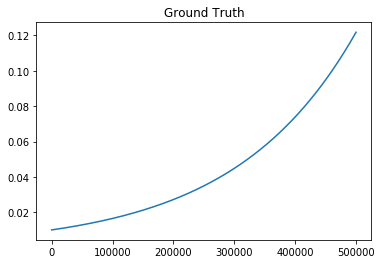

In [128]:
plt.figure()
plt.plot(t, x_gt)
plt.title('Ground Truth')

In [129]:
xf0 = x0 + np.sqrt(p0) * np.random.randn(Nex)
y = x_gt[:, None] + np.sqrt(r) * np.random.randn(t.size, Nex)
xf = np.ones([t.size, Nex]) * np.nan
pf = np.ones(t.size) * np.nan
rmse_f = xf.copy()
xa = xf.copy()
pa = pf.copy()
rmse_a = xf.copy()
xf[0] = xf0
pf[0] = p0
k = pf[0]/(r + pf[0])
xa[0] = xf[0] + k * (y[0] - xf[0])
pa[0] = (1 - k) * pf[0]
for ii in range(1, t.size):
    if (ii + 1) % (t.size//10) == 0:
        print(int((ii + 1)/(t.size)*100))
    xf[ii] = xa[ii - 1] * (1 + alpha)
    pf[ii] = pa[ii - 1] * (1 + alpha)**2
    k = pf[ii]/(r + pf[ii])
    xa[ii] = xf[ii] + k * (y[ii] - xf[ii])
    pa[ii] = (1 - k) * pf[ii]
rmse_f = np.abs(xf - x_gt[:, None])
rmse_a = np.abs(xa - x_gt[:, None])

10
20
30
40
50
60
70
80
90
100


In [130]:
rmse_f_ave = np.sqrt((rmse_f**2).mean(axis=-1))
rmse_a_ave = np.sqrt((rmse_a**2).mean(axis=-1))

Text(0.5, 1.0, 'Analysis')

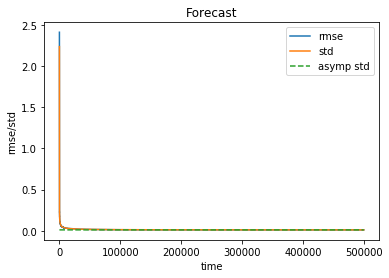

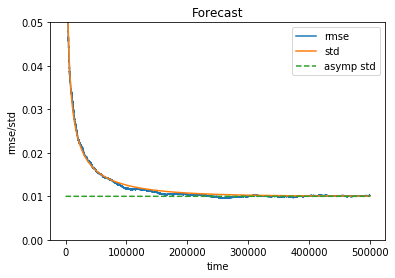

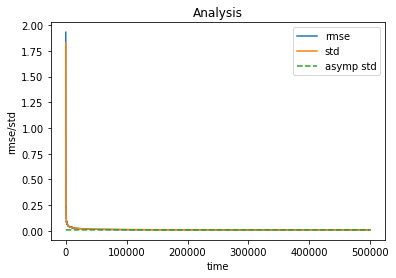

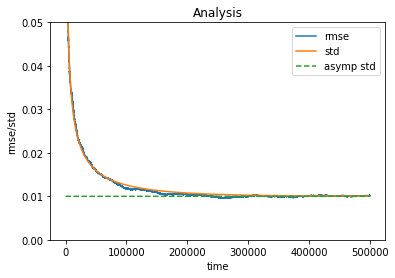

In [135]:
plt.figure()
plt.plot(t, rmse_f_ave)
plt.plot(t, np.sqrt(pf))
plt.plot(t, np.ones_like(t) * np.sqrt(pf_asy), '--')
plt.legend(['rmse',
            'std',
            'asymp std'])
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Forecast')

plt.figure()
plt.plot(t, rmse_f_ave)
plt.plot(t, np.sqrt(pf))
plt.plot(t, np.ones_like(t) * np.sqrt(pf_asy), '--')
plt.ylim([0, np.sqrt(pf_asy)*5])
plt.legend(['rmse',
            'std',
            'asymp std'])
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Forecast')

plt.figure()
plt.plot(t, rmse_a_ave)
plt.plot(t, np.sqrt(pa))
plt.plot(t, np.ones_like(t) * np.sqrt(pa_asy), '--')
plt.legend(['rmse',
            'std',
            'asymp std'])
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Analysis')

plt.figure()
plt.plot(t, rmse_a_ave)
plt.plot(t, np.sqrt(pa))
plt.plot(t, np.ones_like(t) * np.sqrt(pa_asy), '--')
plt.ylim([0, np.sqrt(pa_asy)*5])
plt.legend(['rmse',
            'std',
            'asymp std'])
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Analysis')

In [132]:
rmse_f_err = rmse_f_ave - np.sqrt(pf_asy)
std_f_err = np.sqrt(pf) - np.sqrt(pf_asy)

rmse_a_err = rmse_a_ave - np.sqrt(pa_asy)
std_a_err = np.sqrt(pa) - np.sqrt(pa_asy)

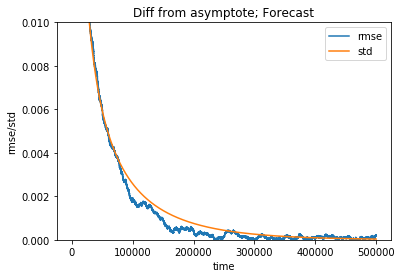

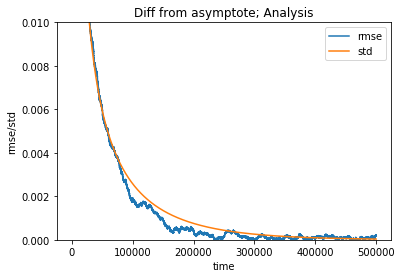

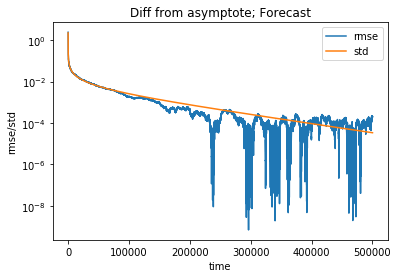

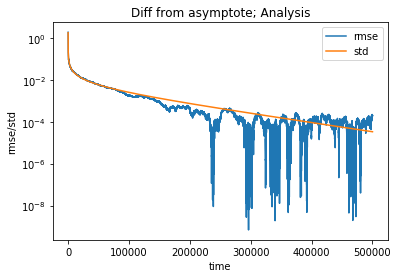

In [144]:
plt.figure()
plt.plot(np.abs(rmse_f_err))
plt.plot(np.abs(std_f_err))
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Diff from asymptote; Forecast')
plt.legend(['rmse',
            'std'])
plt.ylim([0, 1e-2])

plt.figure()
plt.plot(np.abs(rmse_a_err))
plt.plot(np.abs(std_a_err))
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Diff from asymptote; Analysis')
plt.legend(['rmse',
            'std'])
plt.ylim([0, 1e-2])

plt.figure()
plt.semilogy(np.abs(rmse_f_err))
plt.semilogy(np.abs(std_f_err))
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Diff from asymptote; Forecast')
plt.legend(['rmse',
            'std'])

plt.figure()
plt.semilogy(np.abs(rmse_a_err))
plt.semilogy(np.abs(std_a_err))
plt.xlabel('time')
plt.ylabel('rmse/std')
plt.title('Diff from asymptote; Analysis')
plt.legend(['rmse',
            'std'])